# Bagging: árbol

En este notebook clasificaremos si una instancia tiene alto poder adquisitivo mediante Bagging (con un árbol de decisión)

Se utilizarán dos preprocessings diferentes:
* Las variables utilizadas en la primera parte del trabajo práctico.
* Todas las variables sin modificación alguna

In [1]:
# Modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Búsqueda
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics
from sklearn.metrics import roc_curve, plot_roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# Otros
import pandas as pd
from preprocessing import preprocessing_base_parte_1
import utils

# Plots
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = utils.get_data()

In [8]:
def get_resultados_altura(X_train, y_train, X_test, y_test):
    resultados = pd.DataFrame({"Altura": [], "RocAUC": [], "Accuracy": [], "Tipo": []})
    for altura in range(2, 31):
        print("Ejecutando altura: ", altura)
        bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=altura, criterion='entropy'),
                                n_estimators=501,
                                n_jobs=-1,
                                random_state=27)
        bag.fit(X_train, y_train)
        resultados = resultados.append({"Altura": altura,
                          "RocAUC": roc_auc_score(y_train, bag.predict_proba(X_train)[:,1]),
                          "Accuracy": accuracy_score(y_train, bag.predict(X_train)),
                          "Tipo": "Train"}, ignore_index=True)
        resultados = resultados.append({"Altura": altura,
                          "RocAUC": roc_auc_score(y_test, bag.predict_proba(X_test)[:,1]),
                          "Accuracy": accuracy_score(y_test, bag.predict(X_test)),
                          "Tipo": "Test"}, ignore_index=True)
    return resultados

In [4]:
def plot_resultados_altura(resultados):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, dpi=150, figsize=(12, 5*2))
    sns.lineplot(data=resultados,
                 x = "Altura",
                 y = "RocAUC",
                 hue = "Tipo",
                 palette="tab10", linewidth=2.5,
                 ax=ax1)
    ax1.set_title('RocAUC en train y test según la altura de los árboles')
    ax1.set_ylabel('Roc AUC')
    ax1.set_xlabel('Altura')
    ax1.legend()
    ax1.set_xticks(range(1, 31))
    maxroc_idx = resultados[resultados["Tipo"] == "Test"]["RocAUC"].idxmax(axis=0)
    maxroc_altura = resultados.iloc[maxroc_idx]["Altura"]
    ax1.axvline(x = maxroc_altura, color="black", linestyle="--")

    sns.lineplot(data=resultados,
                 x = "Altura",
                 y = "Accuracy",
                 hue = "Tipo",
                 palette="tab10", linewidth=2.5,
                 ax=ax2)
    ax2.set_title('Accuracy en train y test según la altura de los árboles')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Altura')
    ax2.legend()
    ax2.set_xticks(range(1, 30))
    maxacc_idx = resultados[resultados["Tipo"] == "Test"]["Accuracy"].idxmax(axis=0)
    maxacc_altura = resultados.iloc[maxacc_idx]["Altura"]
    ax2.axvline(x = maxacc_altura, color="black", linestyle="--")


    plt.show()

### Modelo 1 - Preprocessing parte 1

Este Bagging será entrenado con las siguientes variables:

* **Ganancia/Pérdida declara en la bolsa argentina**: `ganancia_perdida_declarada_bolsa_argentina`
* **Edad**: `edad`
* **Rol familiar registrado**: `rol_familiar_registrado`
* **Años estudiados**: `anios_estudiados`

In [5]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
Y = df['tiene_alto_valor_adquisitivo']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, Y, random_state=27)

X_train_1, X_test_1 = preprocessing_base_parte_1(X_train_1, X_test_1)

#### Buscamos la mejor altura.

In [10]:
resultados1 = get_resultados_altura(X_train_1, y_train_1, X_test_1, y_test_1)

Ejecutando altura:  2
Ejecutando altura:  3
Ejecutando altura:  4
Ejecutando altura:  5
Ejecutando altura:  6
Ejecutando altura:  7
Ejecutando altura:  8
Ejecutando altura:  9
Ejecutando altura:  10
Ejecutando altura:  11
Ejecutando altura:  12
Ejecutando altura:  13
Ejecutando altura:  14
Ejecutando altura:  15
Ejecutando altura:  16
Ejecutando altura:  17
Ejecutando altura:  18
Ejecutando altura:  19
Ejecutando altura:  20
Ejecutando altura:  21
Ejecutando altura:  22
Ejecutando altura:  23
Ejecutando altura:  24
Ejecutando altura:  25
Ejecutando altura:  26
Ejecutando altura:  27
Ejecutando altura:  28
Ejecutando altura:  29
Ejecutando altura:  30


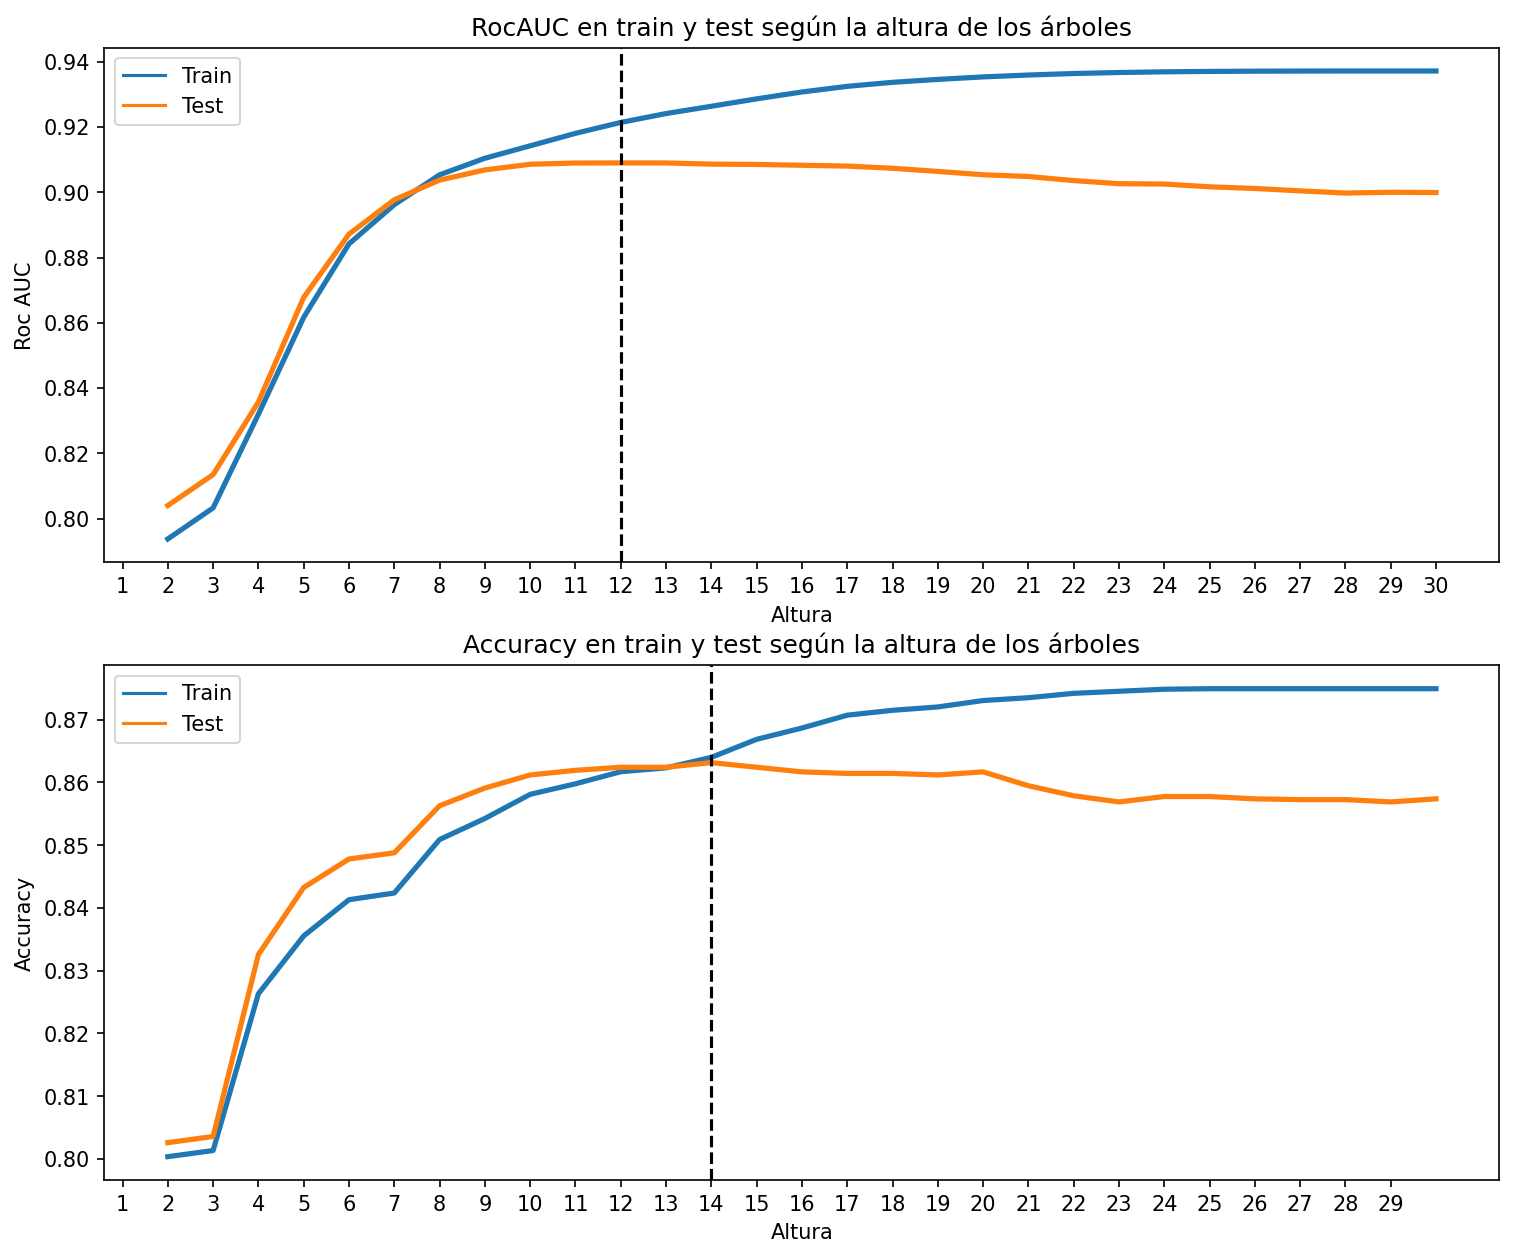

In [11]:
plot_resultados_altura(resultados1)

In [12]:
bagging1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=12),
                            n_estimators = 501,
                            n_jobs=-1,
                            random_state=27)

In [13]:
bagging1.fit(X_train_1, y_train_1)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=12),
                  n_estimators=501, n_jobs=-1, random_state=27)

In [15]:
print(classification_report(y_test_1, bagging1.predict(X_test_1), digits=4))

              precision    recall  f1-score   support

           0     0.8750    0.9564    0.9139      6186
           1     0.8043    0.5678    0.6657      1955

    accuracy                         0.8630      8141
   macro avg     0.8397    0.7621    0.7898      8141
weighted avg     0.8580    0.8630    0.8543      8141



Vemos que el modelo resulta bueno. Un accuray de 86.3%, precision de unos relativamente alta como así también relativamente de ceros.

Veamos ahora la matriz de confusión

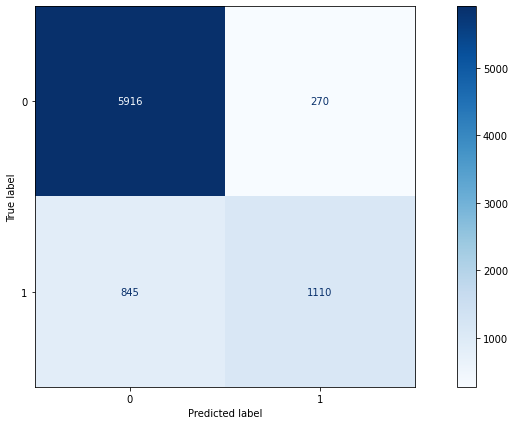

In [16]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(bagging1, X_test_1, y_test_1, cmap=plt.cm.Blues, display_labels=['0', '1'], ax=ax)
plt.show()

La matriz de confusión nos muestra la alta canidad de falsos negativos.


Veamos la curva ROC y su puntuación AUC

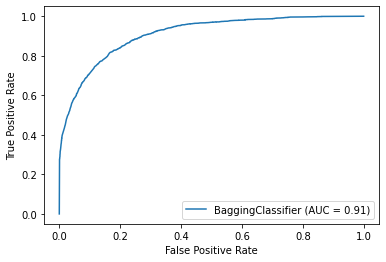

In [17]:
plot_roc_curve(bagging1, X_test_1, y_test_1)

In [18]:
print("El score de RocAUC es de: ", round(roc_auc_score(y_test_1, bagging1.predict_proba(X_test_1)[:, 1]), 4))

El score de RocAUC es de:  0.9081


Se obtuvieron buenos scores.

## Modelo 2 - Sin preprocesamiento

La idea de este modelo es dejar que RandomForest se entrene sin sesgar las features a utilizar (que pueda utilizar absolutamente todas)

Creemos que esto se justifica ya que RandomForest busca realizar la votación de múltiples árboles relativamente diferentes entre sí, por lo que tiene sentido dejar todas las variables.

Veamos qué sucede!

In [19]:
X = df[df.columns.drop('tiene_alto_valor_adquisitivo')]
X = pd.get_dummies(X, drop_first=True)
Y = df['tiene_alto_valor_adquisitivo']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, Y, random_state=27)

In [20]:
resultados2 = get_resultados_altura(X_train_2, y_train_2, X_test_2, y_test_2)

Ejecutando altura:  2
Ejecutando altura:  3
Ejecutando altura:  4
Ejecutando altura:  5
Ejecutando altura:  6
Ejecutando altura:  7
Ejecutando altura:  8
Ejecutando altura:  9
Ejecutando altura:  10
Ejecutando altura:  11
Ejecutando altura:  12
Ejecutando altura:  13
Ejecutando altura:  14
Ejecutando altura:  15
Ejecutando altura:  16
Ejecutando altura:  17
Ejecutando altura:  18
Ejecutando altura:  19
Ejecutando altura:  20
Ejecutando altura:  21
Ejecutando altura:  22
Ejecutando altura:  23
Ejecutando altura:  24
Ejecutando altura:  25
Ejecutando altura:  26
Ejecutando altura:  27
Ejecutando altura:  28
Ejecutando altura:  29
Ejecutando altura:  30


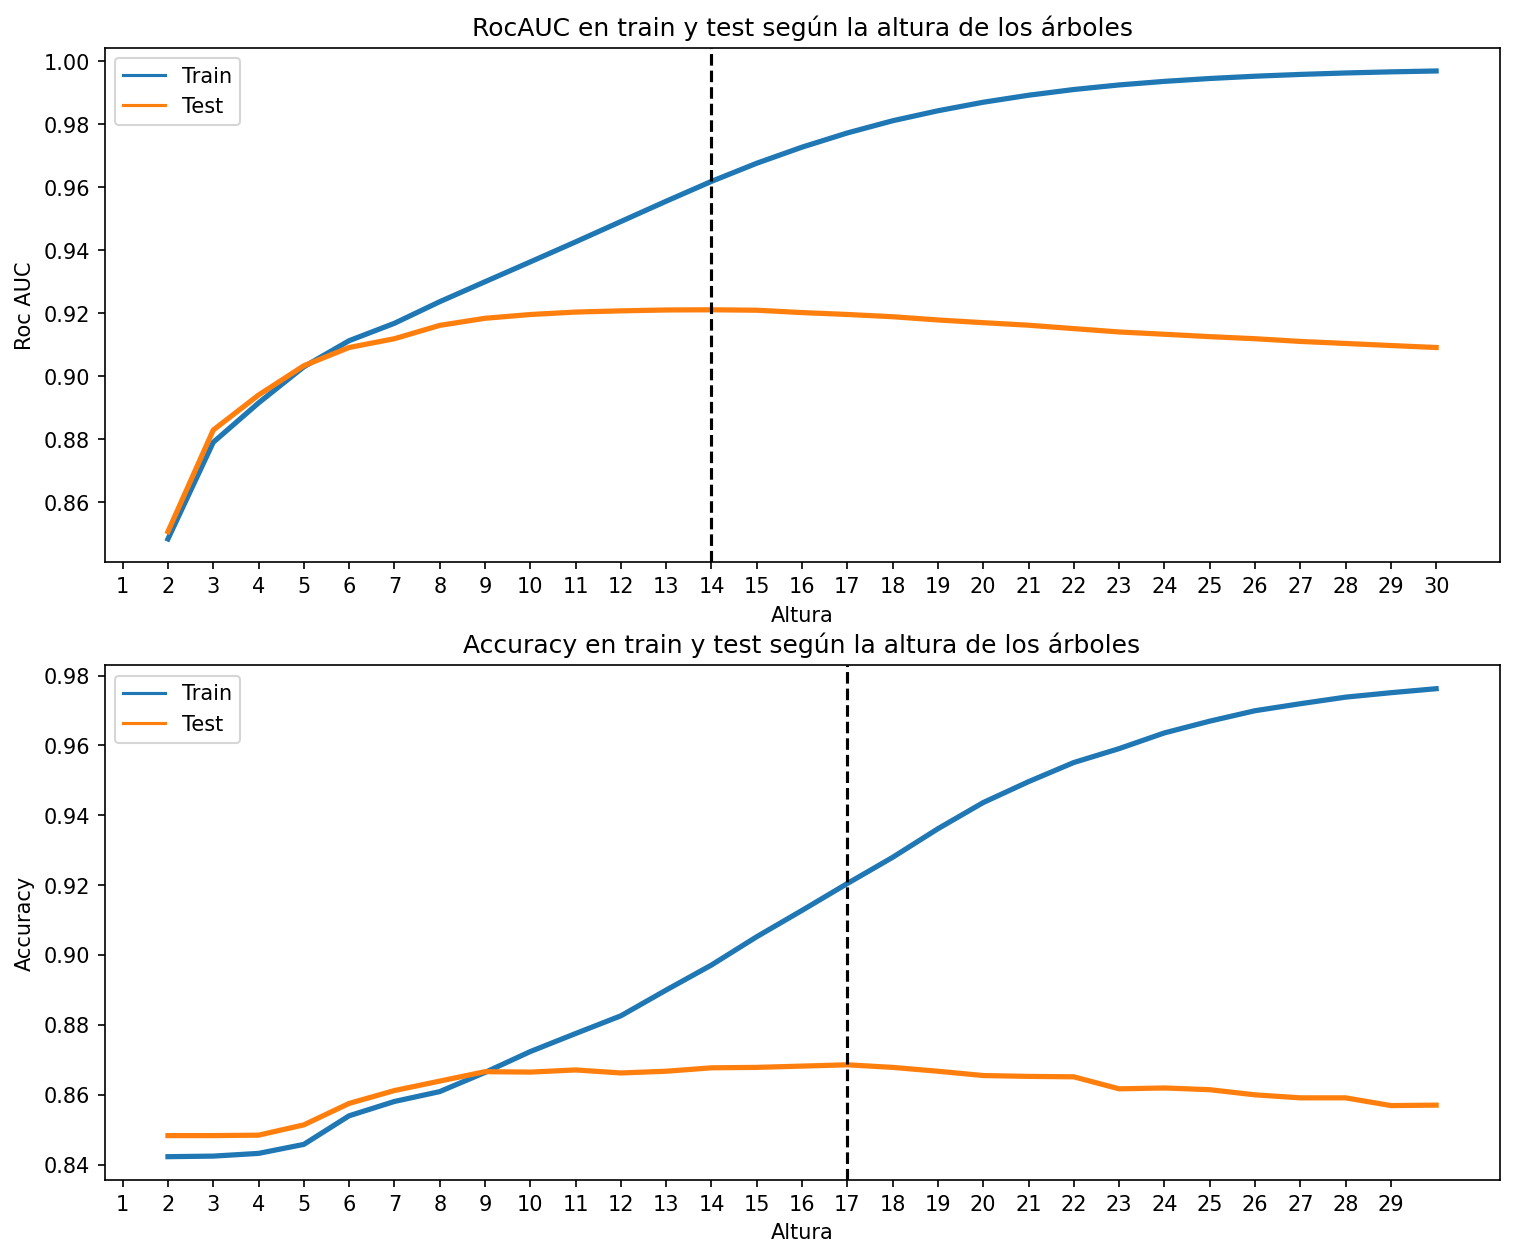

In [21]:
plot_resultados_altura(resultados2)

Vemos la curva de RocAUC overfittea antes que la de accuracy pero luego de l altura 12 o 13 la tasa de crecimiento del Accuracy en Train es altísima.

Dado que la intersección de la accuracy entre train y test se da en la altura 9 aproximadamente y para esta altura la diferencia de RocAUC no es mucha nos quedaremos con dicho valor.


In [22]:
bagging2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                            n_estimators = 1001,
                            n_jobs=-1,
                            random_state=27)

In [23]:
bagging2.fit(X_train_2, y_train_2)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                  n_estimators=1001, n_jobs=-1, random_state=27)

In [24]:
print(classification_report(y_test_2,bagging2.predict(X_test_2), digits=4))

              precision    recall  f1-score   support

           0     0.8802    0.9530    0.9152      6186
           1     0.7985    0.5898    0.6784      1955

    accuracy                         0.8657      8141
   macro avg     0.8394    0.7714    0.7968      8141
weighted avg     0.8606    0.8657    0.8583      8141



Un modelo interesante.

El recall de unos dio apenas por encima del modelo anterior, y su precision emperó apenas por debajo.

Luego, el accuracy dio 86.6%, por lo que el modelo es bueno.

Veamos la matriz de confusión

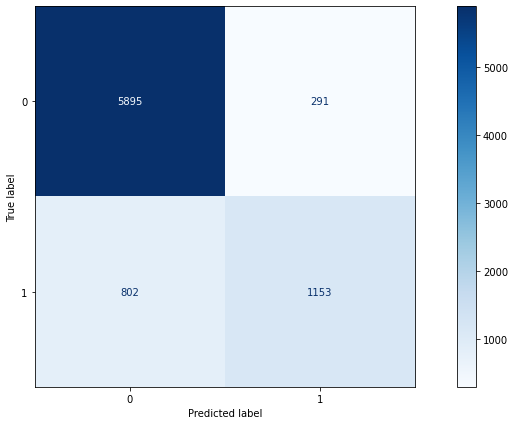

In [25]:
fig, ax = plt.subplots(figsize=(15,7))
plt.grid(False)
plot_confusion_matrix(bagging2, X_test_2, y_test_2, cmap=plt.cm.Blues, display_labels=['0', '1'], ax=ax)
plt.show()

Las conclusiones son similares a la anterior matriz de confusión.

Por último veams la curva ROC y su puntuación AUC

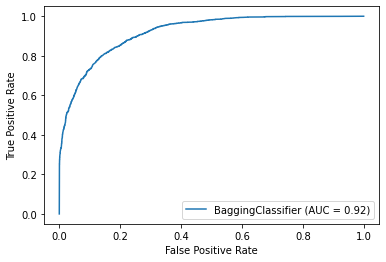

In [26]:
plot_roc_curve(bagging2, X_test_2, y_test_2)

In [27]:
print("El score de RocAUC es de: ", round(roc_auc_score(y_test_2, bagging2.predict_proba(X_test_2)[:, 1]), 4))

El score de RocAUC es de:  0.9186


Un RocAUC bastante alto!

# Persistiendo los modelos

In [28]:
import pickle

In [29]:
pickle.dump(bagging1, open("Modelos/Bagging/bagging1.pickle", "wb"))
pickle.dump(bagging2, open("Modelos/Bagging/bagging2.pickle", "wb"))

# Predicción de HoldOut

Usaremos para predecir el Bagging obtenido para el preprocessing "sin preprocessing"

In [ ]:
bagging2 = pickle.load(open("Modelos/Bagging/bagging2.pickle", "rb"))

In [30]:
def holdout():
    dfv = utils.get_data()
    Xv = dfv[dfv.columns.drop('tiene_alto_valor_adquisitivo')]
    Xv = pd.get_dummies(Xv, drop_first=True)

    ids, X = utils.get_holdout_data()
    X = pd.get_dummies(X, drop_first=True)
    
    notInHoldout=[]
    for c in Xv.columns:
        if c not in X.columns:
            notInHoldout.append(c)
    X[notInHoldout] = 0

    return ids, X

In [31]:
ids, X = holdout()

In [32]:
utils.escribir_holdout(bagging2.predict(X), "7 - Bagging", ids)